In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot
import yfinance
import investpy
from stockstats import StockDataFrame

import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
from scipy.stats import skew, norm
from scipy.signal import argrelextrema
import copy
from sklearn.cluster import KMeans 
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",50)

D:\ProgramFiles\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [5]:
df = pd.read_csv("predictive_maintenance.csv") 

In [6]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [29]:
df.drop(["UDI"],axis=1,inplace=True)
df.drop(["Product ID"],axis=1,inplace=True)

KeyError: "['UDI'] not found in axis"

In [66]:
df.drop(["Target"],axis=1,inplace=True)
df.drop(["Failure Type"],axis=1,inplace=True)

In [31]:
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 8 columns]

<AxesSubplot:xlabel='Target', ylabel='count'>

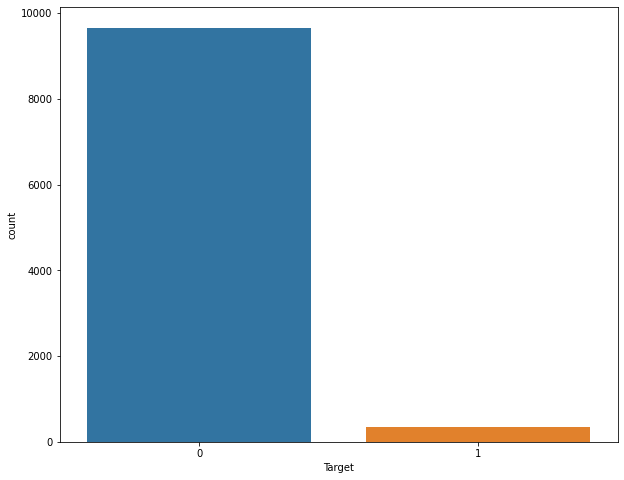

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="Target")

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

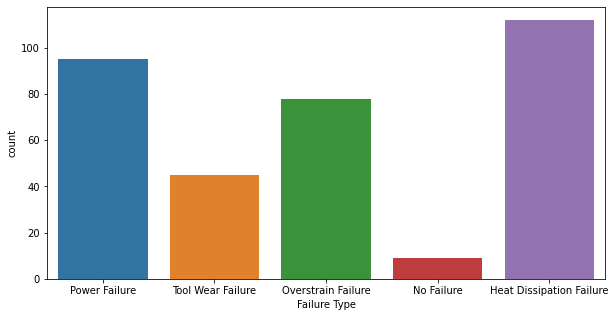

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Target']==1],x="Failure Type")


In [28]:
(df["Product ID"].nunique())

10000

In [26]:
df[‘productid’].value_counts()

SyntaxError: invalid character in identifier (<ipython-input-26-2bd0c07fe4ad>, line 1)

In [21]:
(df[df.Target == 1])

Product ID Type  Air temperature [K]  Process temperature [K]  \
50       L47230    L                298.9                    309.1   
69       L47249    L                298.9                    309.0   
77       L47257    L                298.8                    308.9   
160      L47340    L                298.4                    308.2   
161      L47341    L                298.3                    308.1   
168      L47348    L                298.4                    308.3   
194      M15054    M                298.2                    308.5   
207      M15067    M                298.4                    308.7   
242      L47422    L                298.0                    308.2   
248      L47428    L                298.0                    308.3   
249      L47429    L                298.0                    308.3   
259      M15119    M                298.1                    308.2   
327      L47507    L                297.7                    308.5   
380      L47560    L                297.5                    308.3   
442      L47622    L                297.4                    308.5   
463      L47643    L                297.4                    308.7   
586      L47766    L                297.6                    309.6   
603      L47783    L                297.9                    309.8   
746      L47926    L                296.8                    308.1   
847      L48027    L                296.4                    307.4   
880      M15740    M                295.8                    306.3   
903      L48083    L                295.7                    306.2   
926      L48106    L                295.6                    306.1   
1016     M15876    M                296.3                    307.2   
1085     L48265    L                297.0                    307.8   
1087     H30501    H                296.9                    307.8   
1095     L48275    L                296.9                    307.5   
1123     H30537    H                296.6                    307.7   
1124     M15984    M                296.7                    307.8   
1144     L48324    L                297.0                    307.9   
1161     L48341    L                297.0                    307.8   
1162     L48342    L                296.9                    307.8   
1167     L48347    L                297.0                    308.1   
1284     L48464    L                298.4                    309.5   
1324     M16184    M                298.8                    310.1   
1334     L48514    L                299.0                    310.4   
1335     L48515    L                299.0                    310.4   
1391     L48571    L                298.9                    310.2   
1419     L48599    L                298.7                    309.8   
1437     H30851    H                298.8                    309.9   
1492     M16352    M                298.0                    308.7   
1496     L48676    L                298.0                    308.7   
1509     L48689    L                298.0                    308.5   
1583     L48763    L                298.2                    308.4   
1595     L48775    L                298.0                    308.2   
1682     H31096    H                297.9                    307.4   
1763     L48943    L                298.2                    307.6   
1784     L48964    L                298.3                    308.0   
1789     L48969    L                298.2                    307.9   
1808     L48988    L                298.1                    307.7   
1833     L49013    L                297.8                    307.3   
1996     M16856    M                298.4                    308.0   
2015     L49195    L                298.5                    308.2   
2075     L49255    L                299.5                    309.4   
2125     L49305    L                299.3                    308.9   
2166     M17026    M                299.6                    309.2   
2233     L49413

In [10]:
print(df.isnull().sum())

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [12]:
len(df[df.Target == 1])

339

In [14]:
df.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})


Product ID  count
Target Failure Type                               
0      No Failure                      9643   9643
       Random Failures                   18     18
1      Heat Dissipation Failure         112    112
       No Failure                         9      9
       Overstrain Failure                78     78
       Power Failure                     95     95
       Tool Wear Failure                 45     45

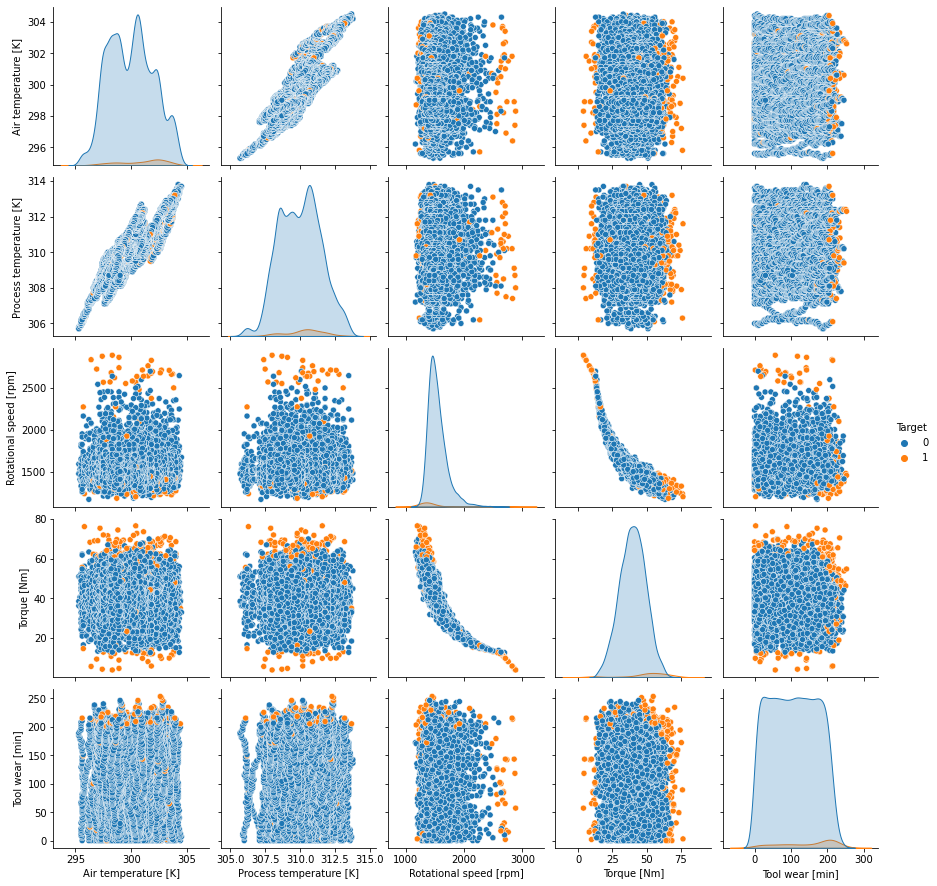

In [34]:
sns.pairplot(df,hue='Target')


<AxesSubplot:>

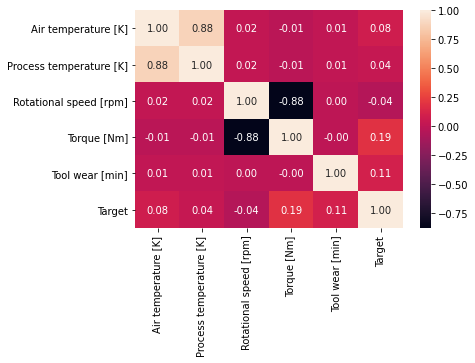

In [35]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")


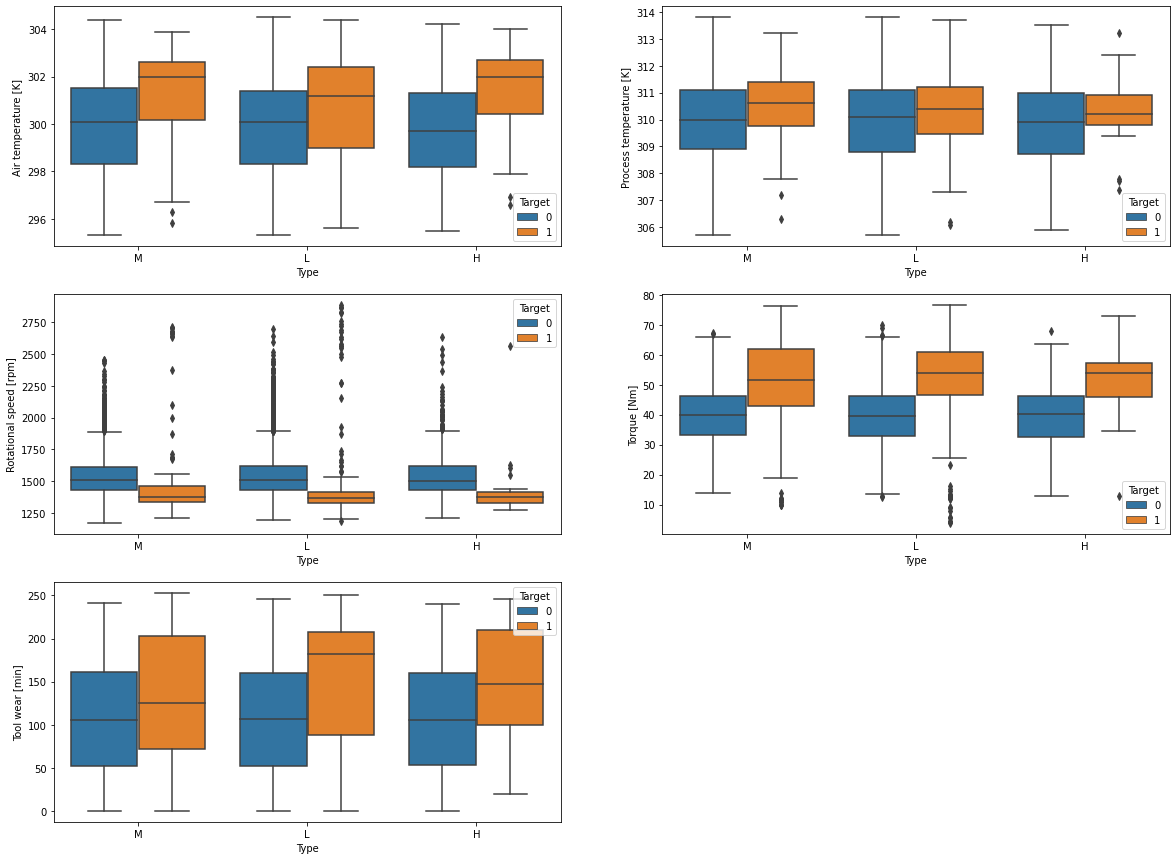

In [37]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Type",hue="Target")
    m+=1

In [39]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [41]:
import plotly.express as px

fig = px.scatter_3d(df, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Target')
fig.show()

In [86]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     0                298.2                    308.7                    1408   
2     0                298.1                    308.5                    1498   
3     0                298.2                    308.6                    1433   
4     0                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  
0         42.8                0  
1         46.3                3  
2         49.4                5  
3         39.5                7  
4         40.0                9

In [85]:
df["Type"] = df["Type"].replace("L",0)
df["Type"] = df["Type"].replace("M",1)
df["Type"] = df["Type"].replace("H",2)

In [65]:
df_target = df.Target.copy()
df_failure_type = df["Failure Type"].copy()

In [87]:
x_train, x_val, y_train, y_val = train_test_split(df, df_target, test_size=0.2, random_state=0)

In [ ]:
train  --> eğitim --> 

8000 satır
x_train : normal sütunlar
y_train : target sütunu
    
2000 satır     
x_val: normal sütun
y_val: target sütun
    
val --> doğrulama

In [88]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [93]:
y_pred = model.predict(x_val)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_val,y_pred)


array([[1925,    0],
       [  74,    1]], dtype=int64)